# Chapter 8: Trustworthy Time Series
For additional context see chapter 8 of *The Virus of Variation*. Questions? Email James.Lehner@gmail.com or QualityIsBroken@gmail.com.

In [1]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from process_improvement import comparison_charts as cc
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

## Get the data

In [37]:
# Establish the dataset_url
rate_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/death-to-birth-rates-by-hospital-1784-to-1849.csv'

# Get data function
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
rate_df = get_data(rate_url)

# Drop unnecessary columns
rate_df = rate_df.drop('Note', axis=1)

# Specify 'Year' column dtype as string
rate_df['Year'] = rate_df['Year'].astype('string')

# Show dataframe
rate_df

,Hospital,Year,Births,Deaths,Rate
0,Vienna General Hospital,1784,284,6,2.1
1,Vienna General Hospital,1785,899,13,1.4
2,Vienna General Hospital,1786,1151,5,0.4
3,Vienna General Hospital,1787,1407,5,0.4
4,Vienna General Hospital,1788,1425,5,0.4
...,...,...,...,...,...
127,Dublin Maternity Hospital,1845,1411,35,2.5
128,Dublin Maternity Hospital,1846,2025,17,0.8
129,Dublin Maternity Hospital,1847,1703,47,2.8
130,Dublin Maternity Hospital,1848,1816,35,1.9


In [38]:
# Split dataframe according to hospital
vienna_df = rate_df[rate_df['Hospital'] == 'Vienna General Hospital']
dublin_df = rate_df[rate_df['Hospital'] == 'Dublin Maternity Hospital'].reset_index(drop=True)

,Hospital,Year,Births,Deaths,Rate
0,Vienna General Hospital,1784,284,6,2.1
1,Vienna General Hospital,1785,899,13,1.4
2,Vienna General Hospital,1786,1151,5,0.4
3,Vienna General Hospital,1787,1407,5,0.4
4,Vienna General Hospital,1788,1425,5,0.4
...,...,...,...,...,...
61,Vienna General Hospital,1845,3492,241,6.9
62,Vienna General Hospital,1846,4010,459,11.4
63,Vienna General Hospital,1847,3490,176,5.0
64,Vienna General Hospital,1848,3556,45,1.3


## Figure 8.1: Time series of death-to-birth rates at Vienna General Hospital

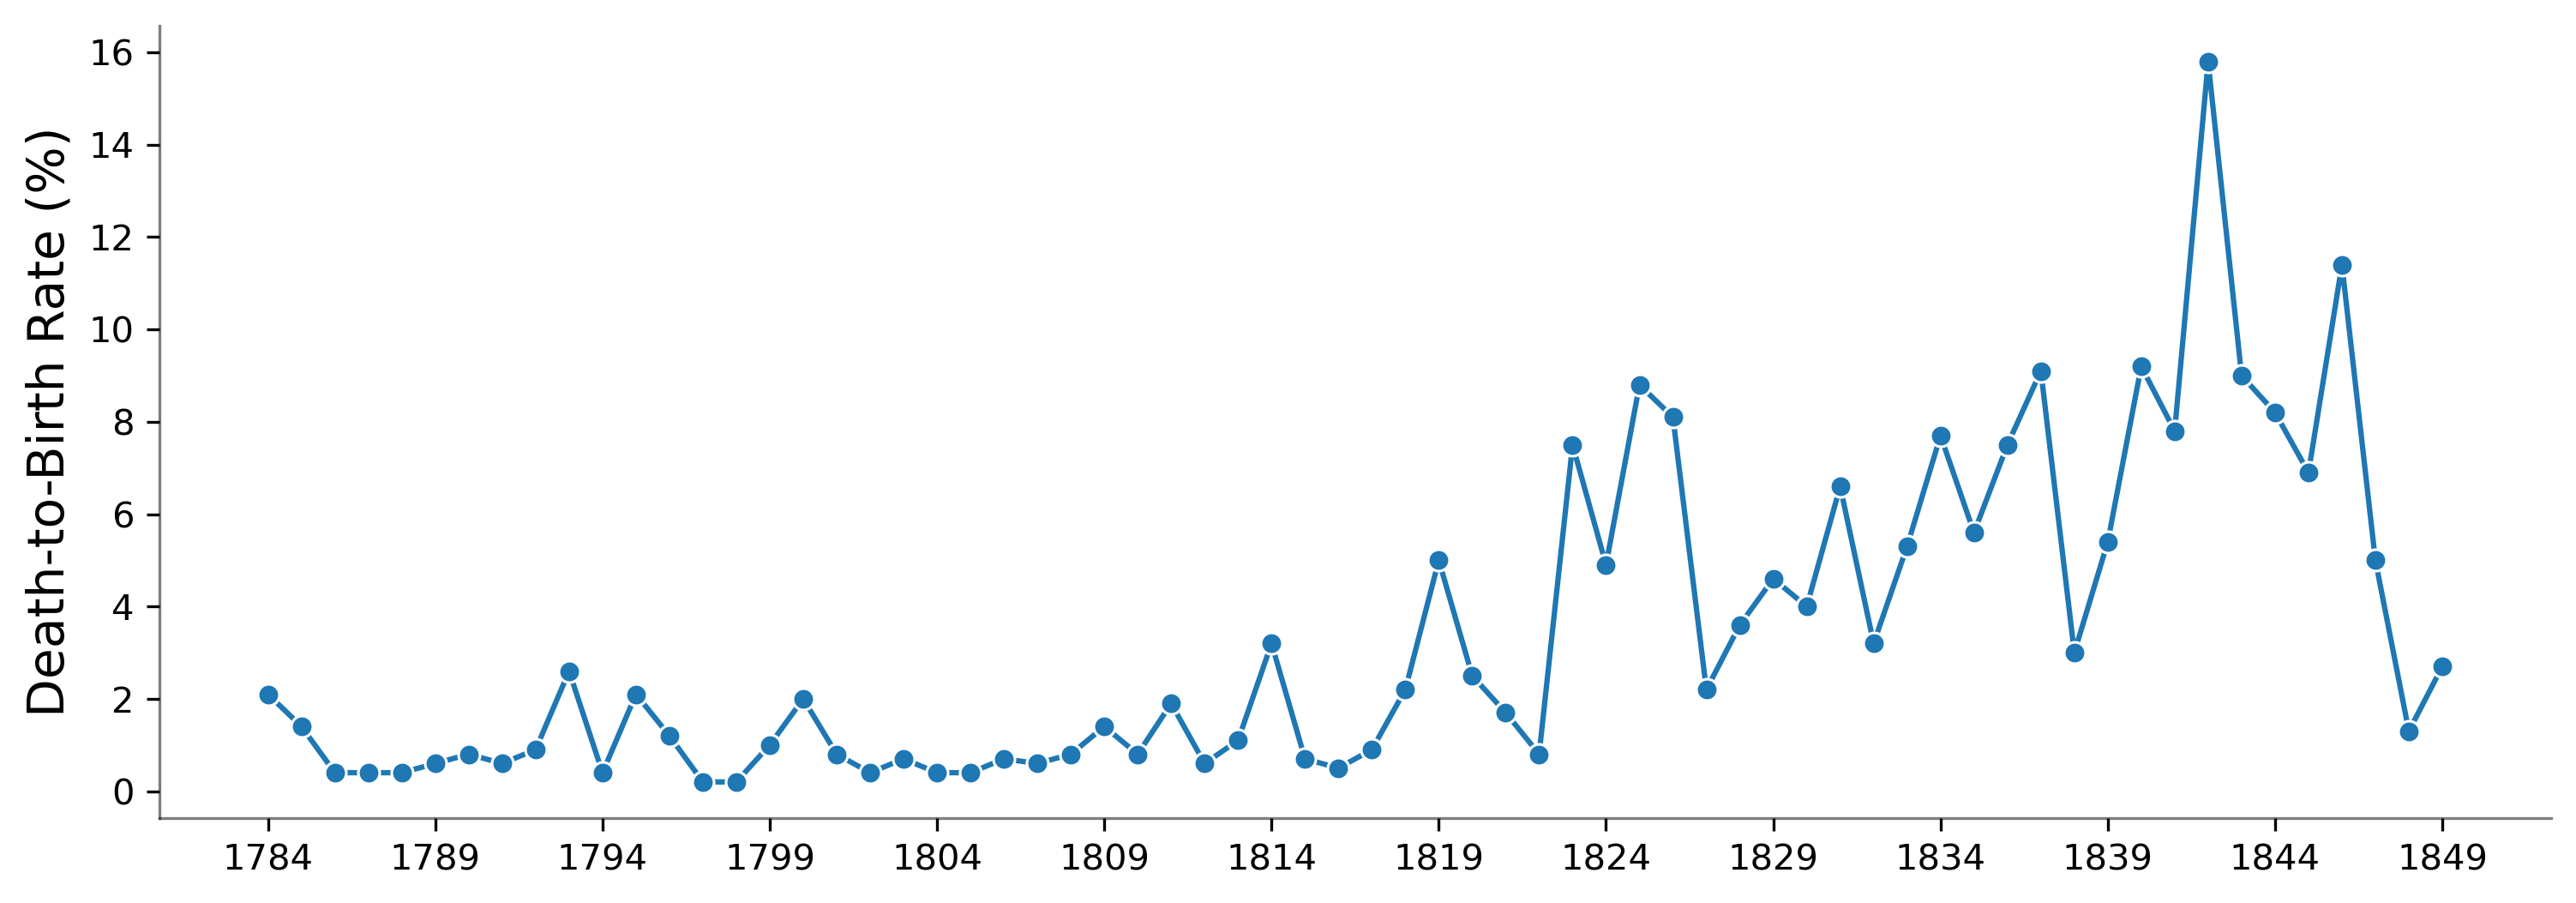

In [32]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in lineplot
sns.lineplot(vienna_df, 
             x='Year', 
             y='Rate', 
             marker='o')

# Set the x-tick labels with increased intervals
labels = vienna_df['Year']
tick_interval = 5
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Add title
# plt.title('Vienna General Hospital Death-to-Birth Rates', fontsize=16)

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
ax.set_ylabel('Death-to-Birth Rate (%)', fontsize=14)
ax.set_xlabel('')
    
# Show plot
plt.show()

## Figure 8.2: Annotated time series of death-to-birth rates at Vienna General Hospital

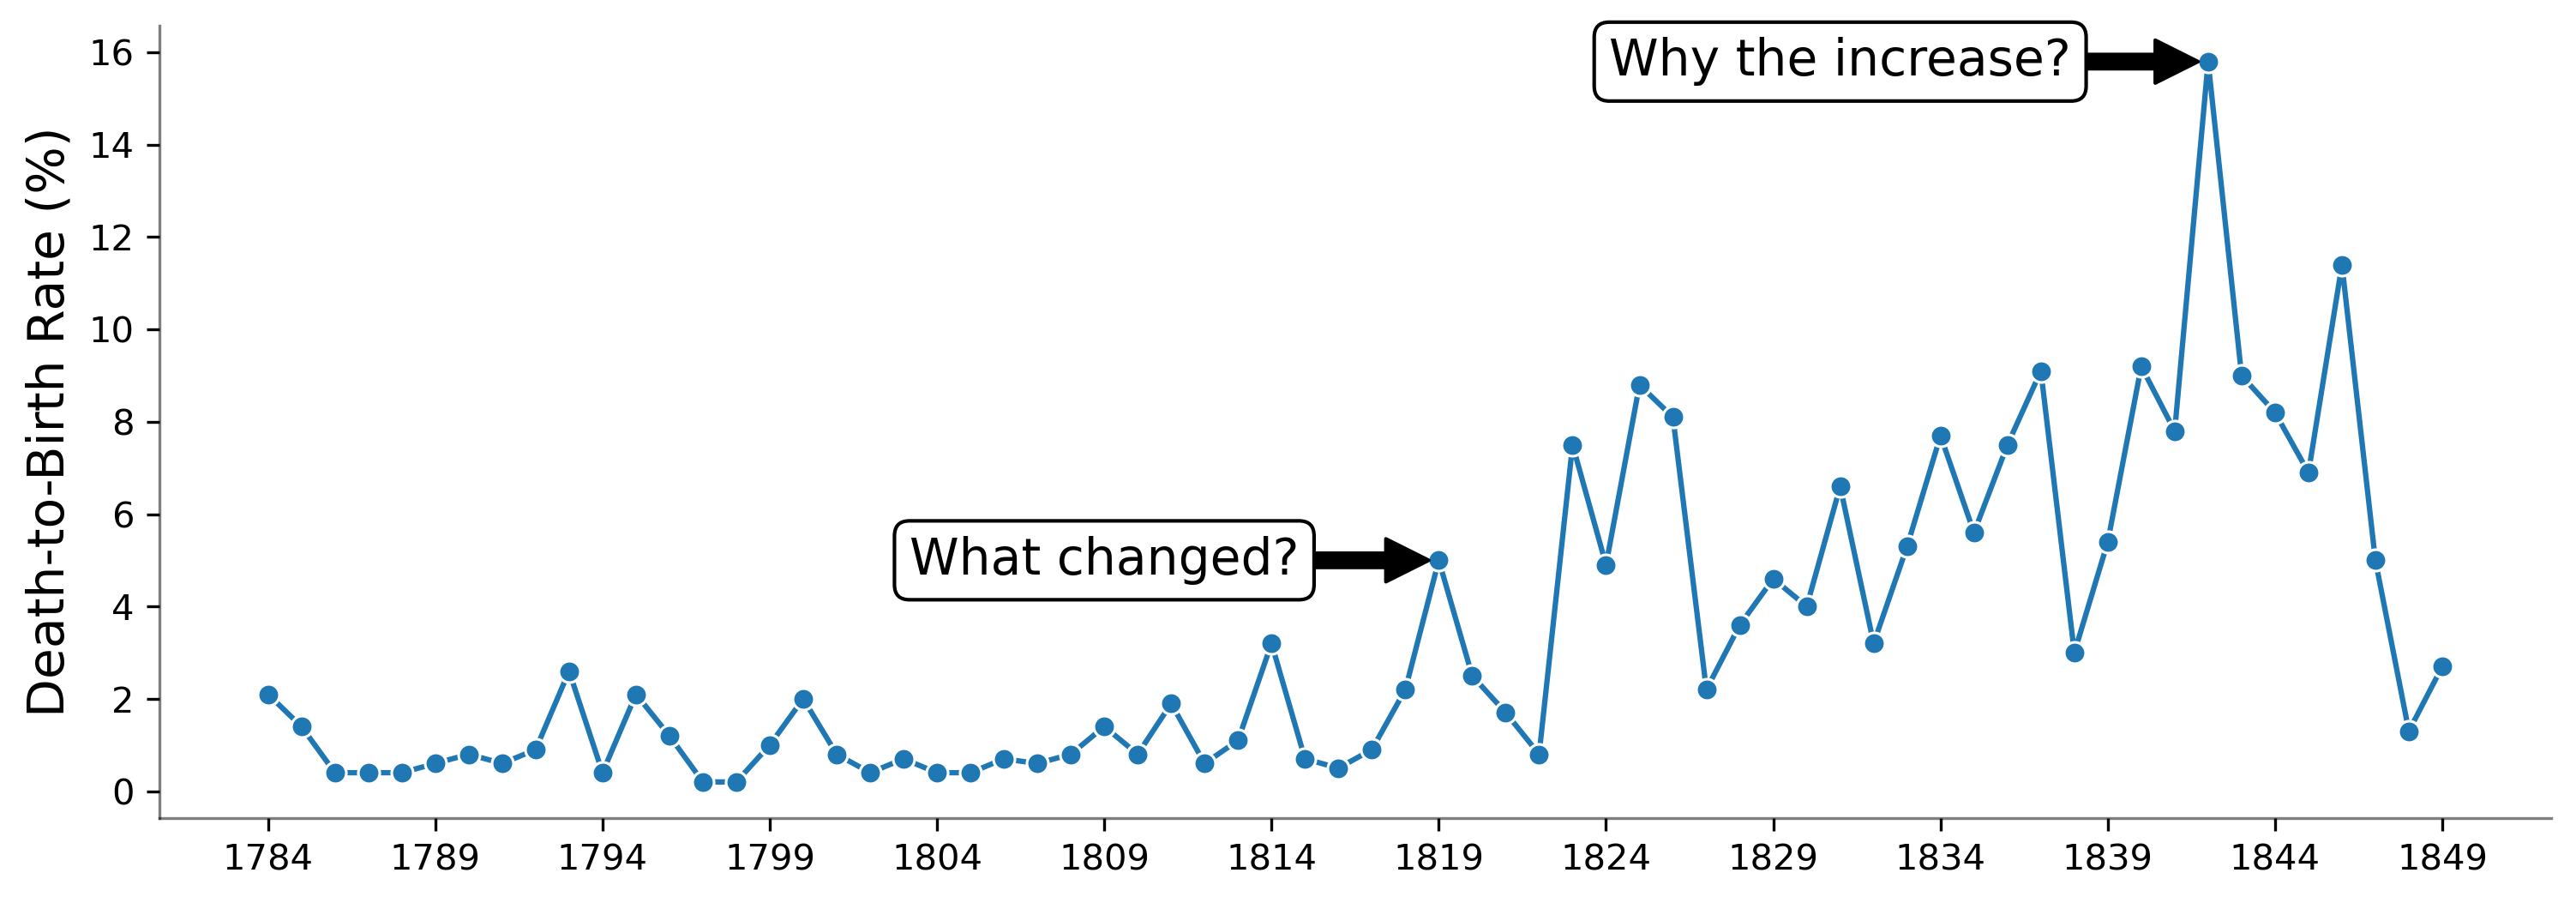

In [36]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in lineplot
sns.lineplot(vienna_df, 
             x='Year', 
             y='Rate', 
             marker='o')

# Set the x-tick labels with increased intervals
labels = vienna_df['Year']
tick_interval = 5
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Add title
# plt.title('Vienna General Hospital Death-to-Birth Rates', fontsize=16)

# Define details for annotations (text, xy-coordinates, xytext-coordinates)
annotations = [
    ('Why the increase?', (57.7,15.8), (47,15.8)),
    ('What changed?', (34.7,5), (25,5))
    ]

# Add annotations using a loop
for text, xy, xytext in annotations:
    ax.annotate(text, xy=xy, xytext=xytext,
                ha='center', va='center', fontsize=14,
                bbox=dict(facecolor='white', boxstyle='round'),
                arrowprops=dict(facecolor='black'))

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
ax.set_ylabel('Death-to-Birth Rate (%)', fontsize=14)
ax.set_xlabel('')
    
# Show plot
plt.show()

## Figure 8.3: Time series of death-to-birth rates at Vienna General Hospital with expanded vertical scale

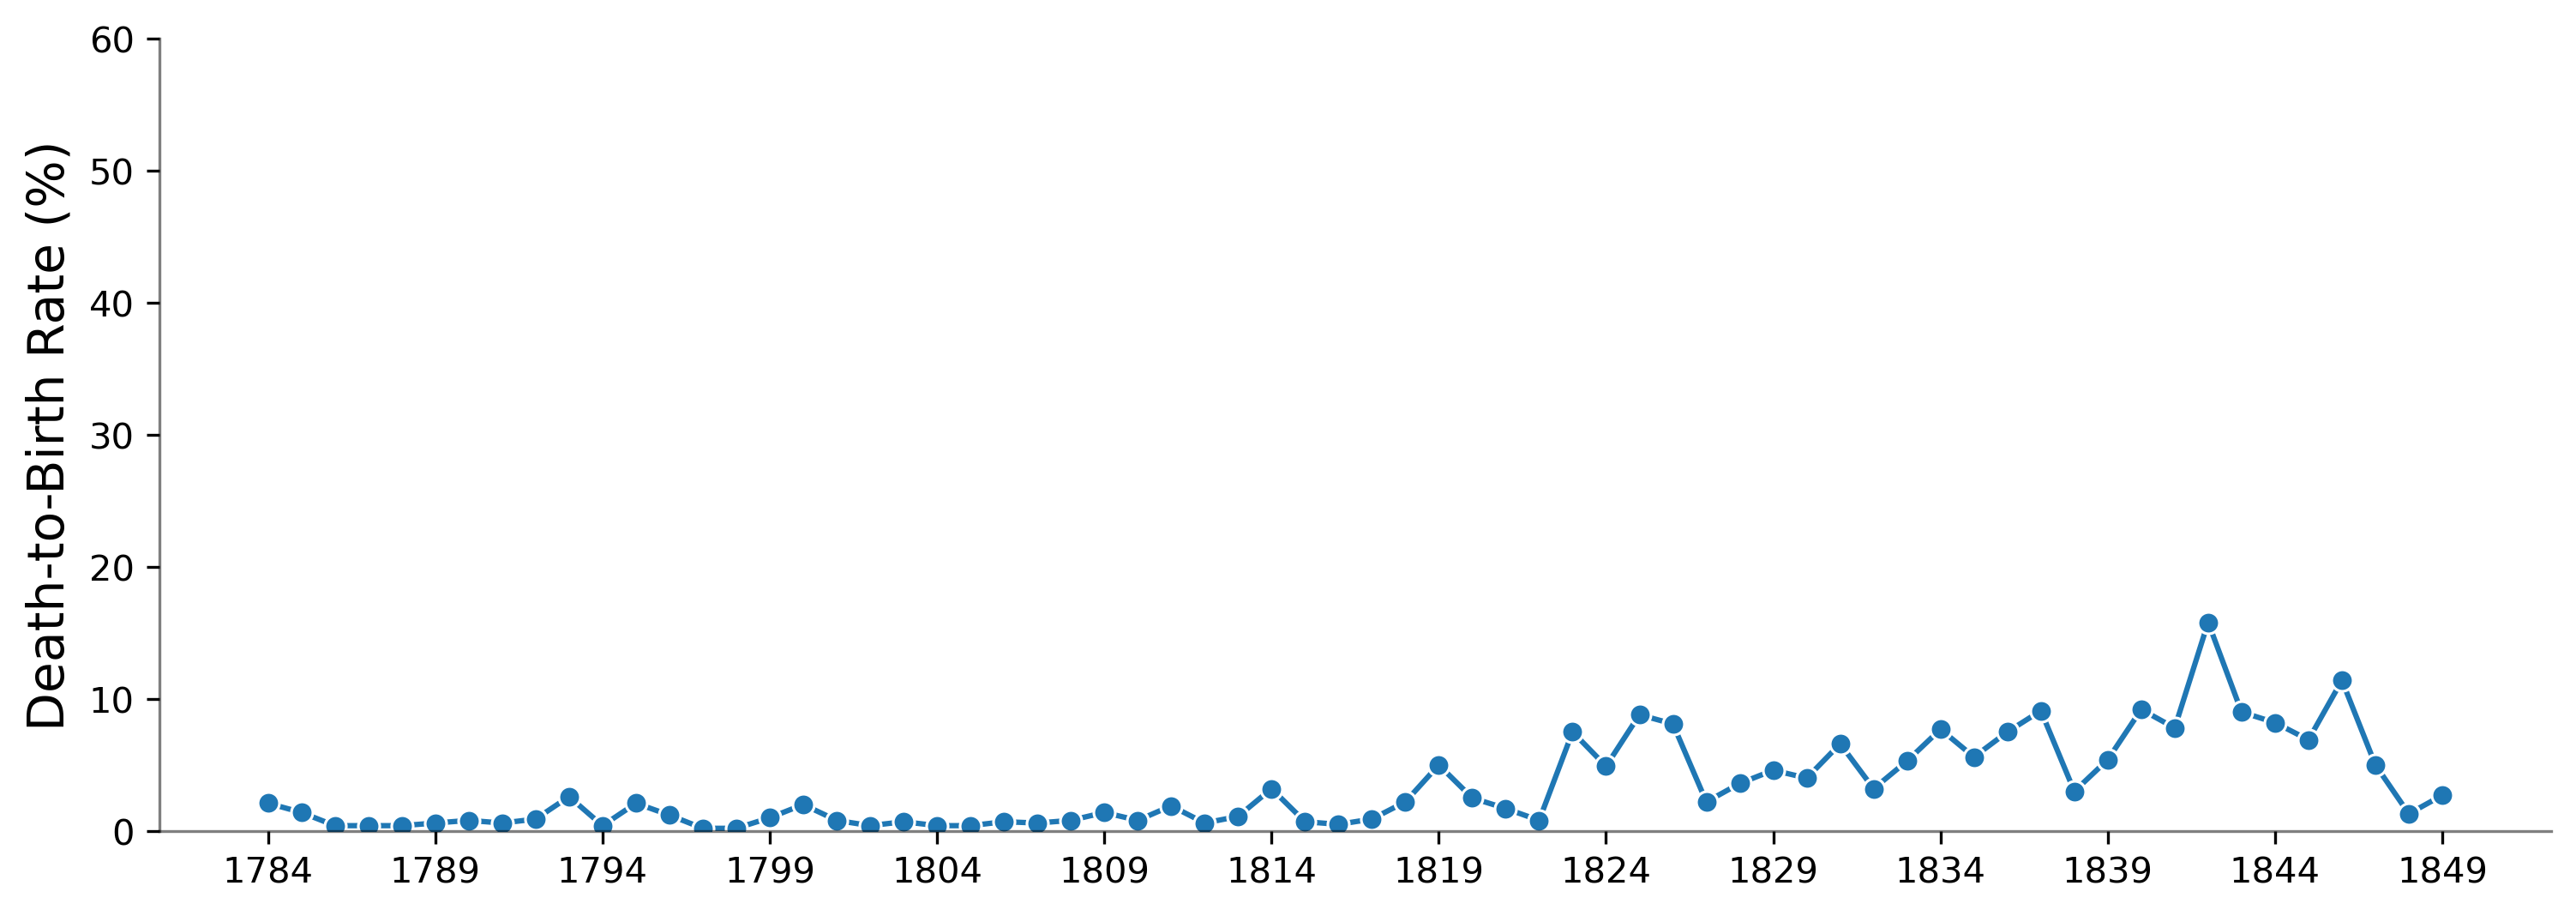

In [18]:
# Indivudal time series with fixed vertical scale
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

sns.lineplot(vienna_df, 
             x='Year', 
             y='Rate', 
             marker='o')

# Set y-axis limits
ax.set_ylim(0,60)

# Set the x-tick labels with increased intervals
labels = vienna_df['Year']
tick_interval = 5
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Add title
# plt.title('Vienna General Hospital Death-to-Birth Rates', fontsize=16)

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)
# Additional formatting
ax.set_ylabel('Death-to-Birth Rate (%)', fontsize=14)
ax.set_xlabel('')

# Show plot
plt.show()

## Figure 8.4: Multiline time series of death-to-birth rates by hospital

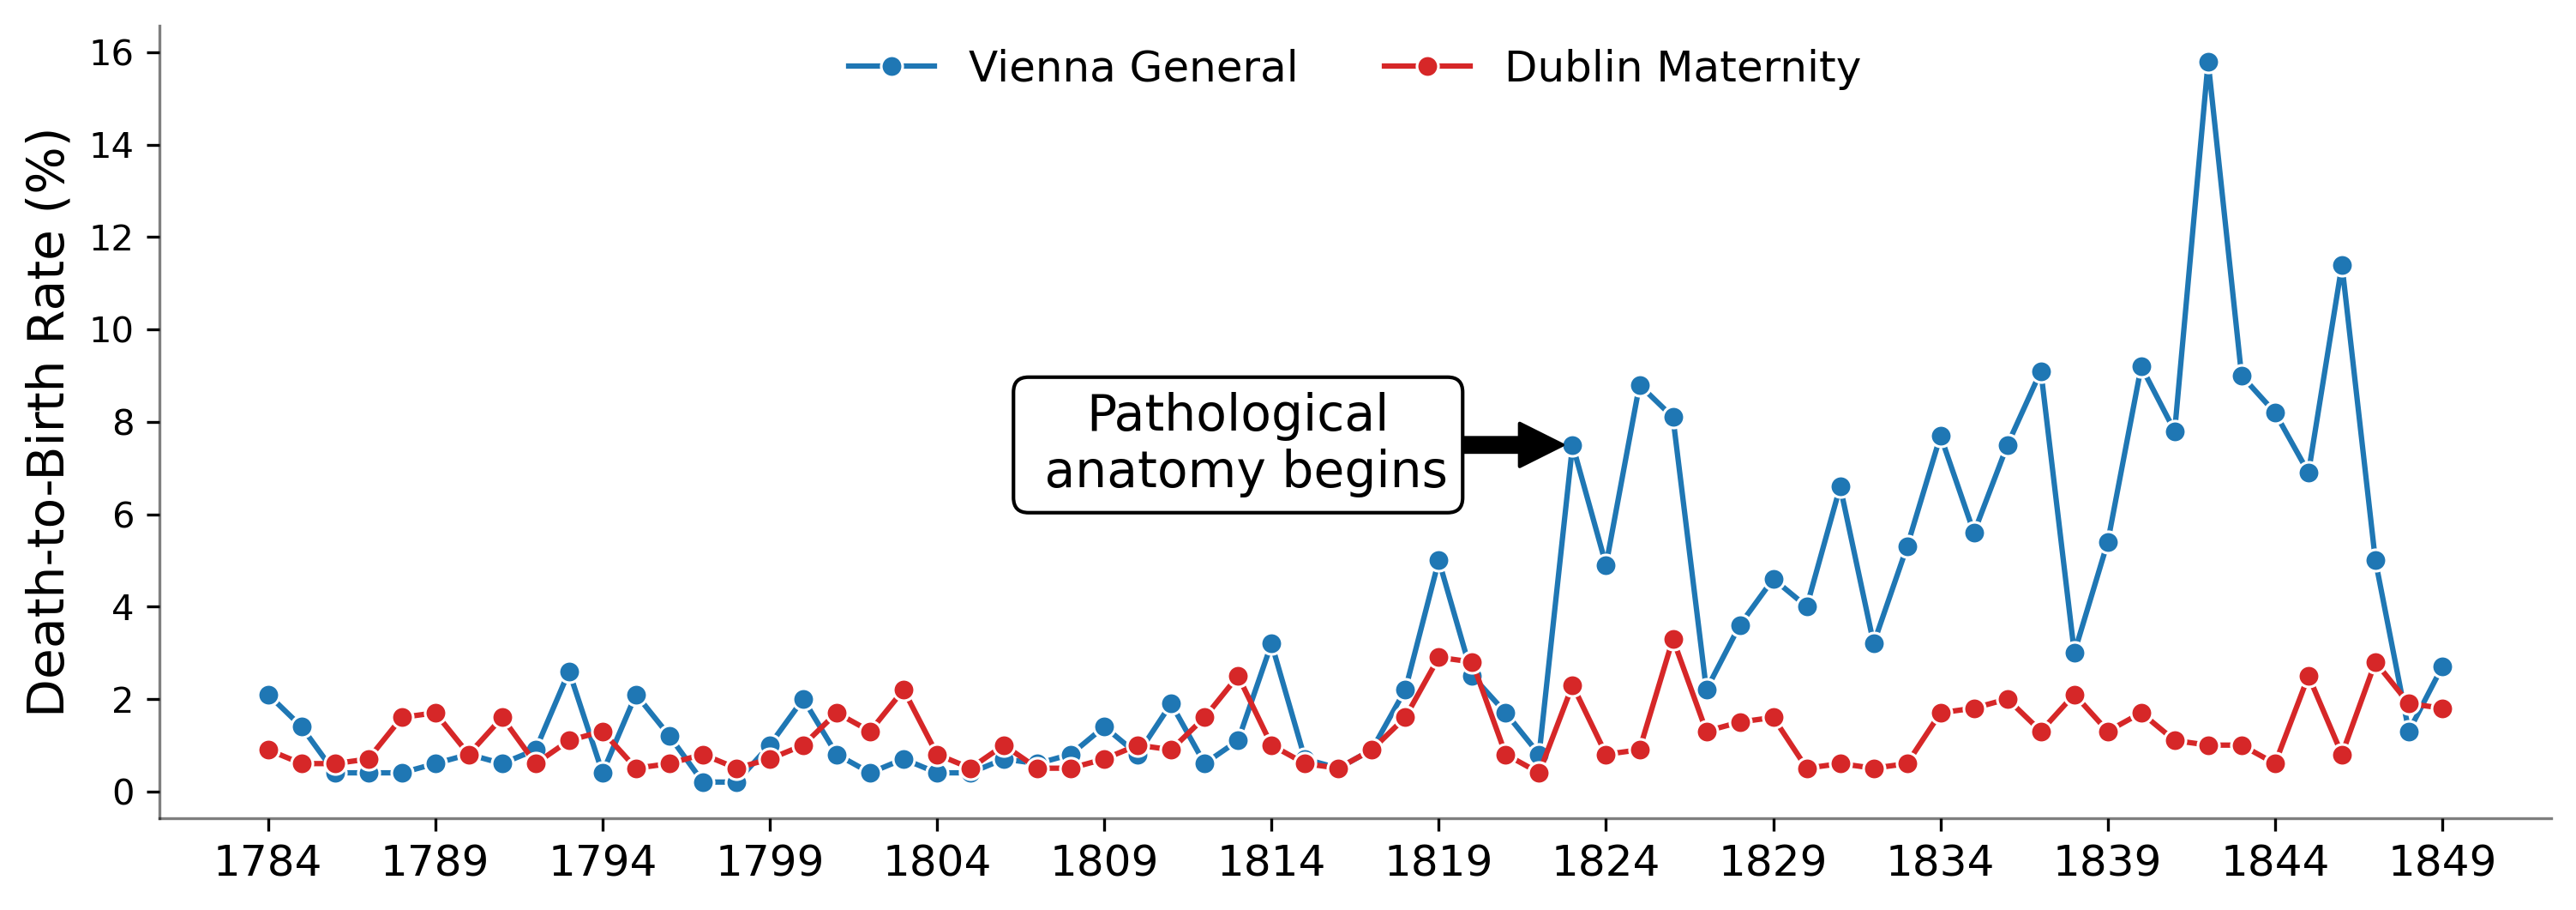

In [21]:
# Vienna General and Dublin General time series
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot Vienna data
sns.lineplot(vienna_df, 
             x='Year', 
             y='Rate', 
             marker='o', 
             label='Vienna General')
# Plot Dublin data
sns.lineplot(dublin_df, 
             x='Year', 
             y='Rate', 
             marker='o', 
             color='tab:red', 
             label='Dublin Maternity')

# Add title
# plt.title('Death-to-Birth Rates by Hospital', fontsize=16)

# Customize the legend
ax.legend(
    title="",        # Remove the legend title
    loc="upper center",   # Place the legend at the top center
    bbox_to_anchor=(0.5, 1.02),  # Adjust the placement to center it
    ncol=2,           # Place the legend items in 2 columns (horizontal layout)
    fontsize=12,       # Optional: Adjust the legend font size
    frameon=False
)

# Annotation for when pathological anatomy began
ax.annotate("Pathological\n anatomy begins",
           xy=(38.7,7.5), 
            xytext=(29,7.5),
            ha='center',
            va='center',
            fontsize=14,
           bbox=dict(facecolor='white', edgecolor='black', boxstyle='Round'),
           arrowprops=dict(facecolor='black'),
           )

# Set the x-tick labels with increased intervals
labels = dublin_df['Year']
tick_interval = 5  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center', fontsize=12) 

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)
# Additional formatting
ax.set_ylabel('Death-to-Birth Rate (%)', fontsize=14)
ax.set_xlabel('')

# Show plot
plt.show()

## Figure 8.5: Time series of death-to-birth rates at Dublin Maternity Hospital

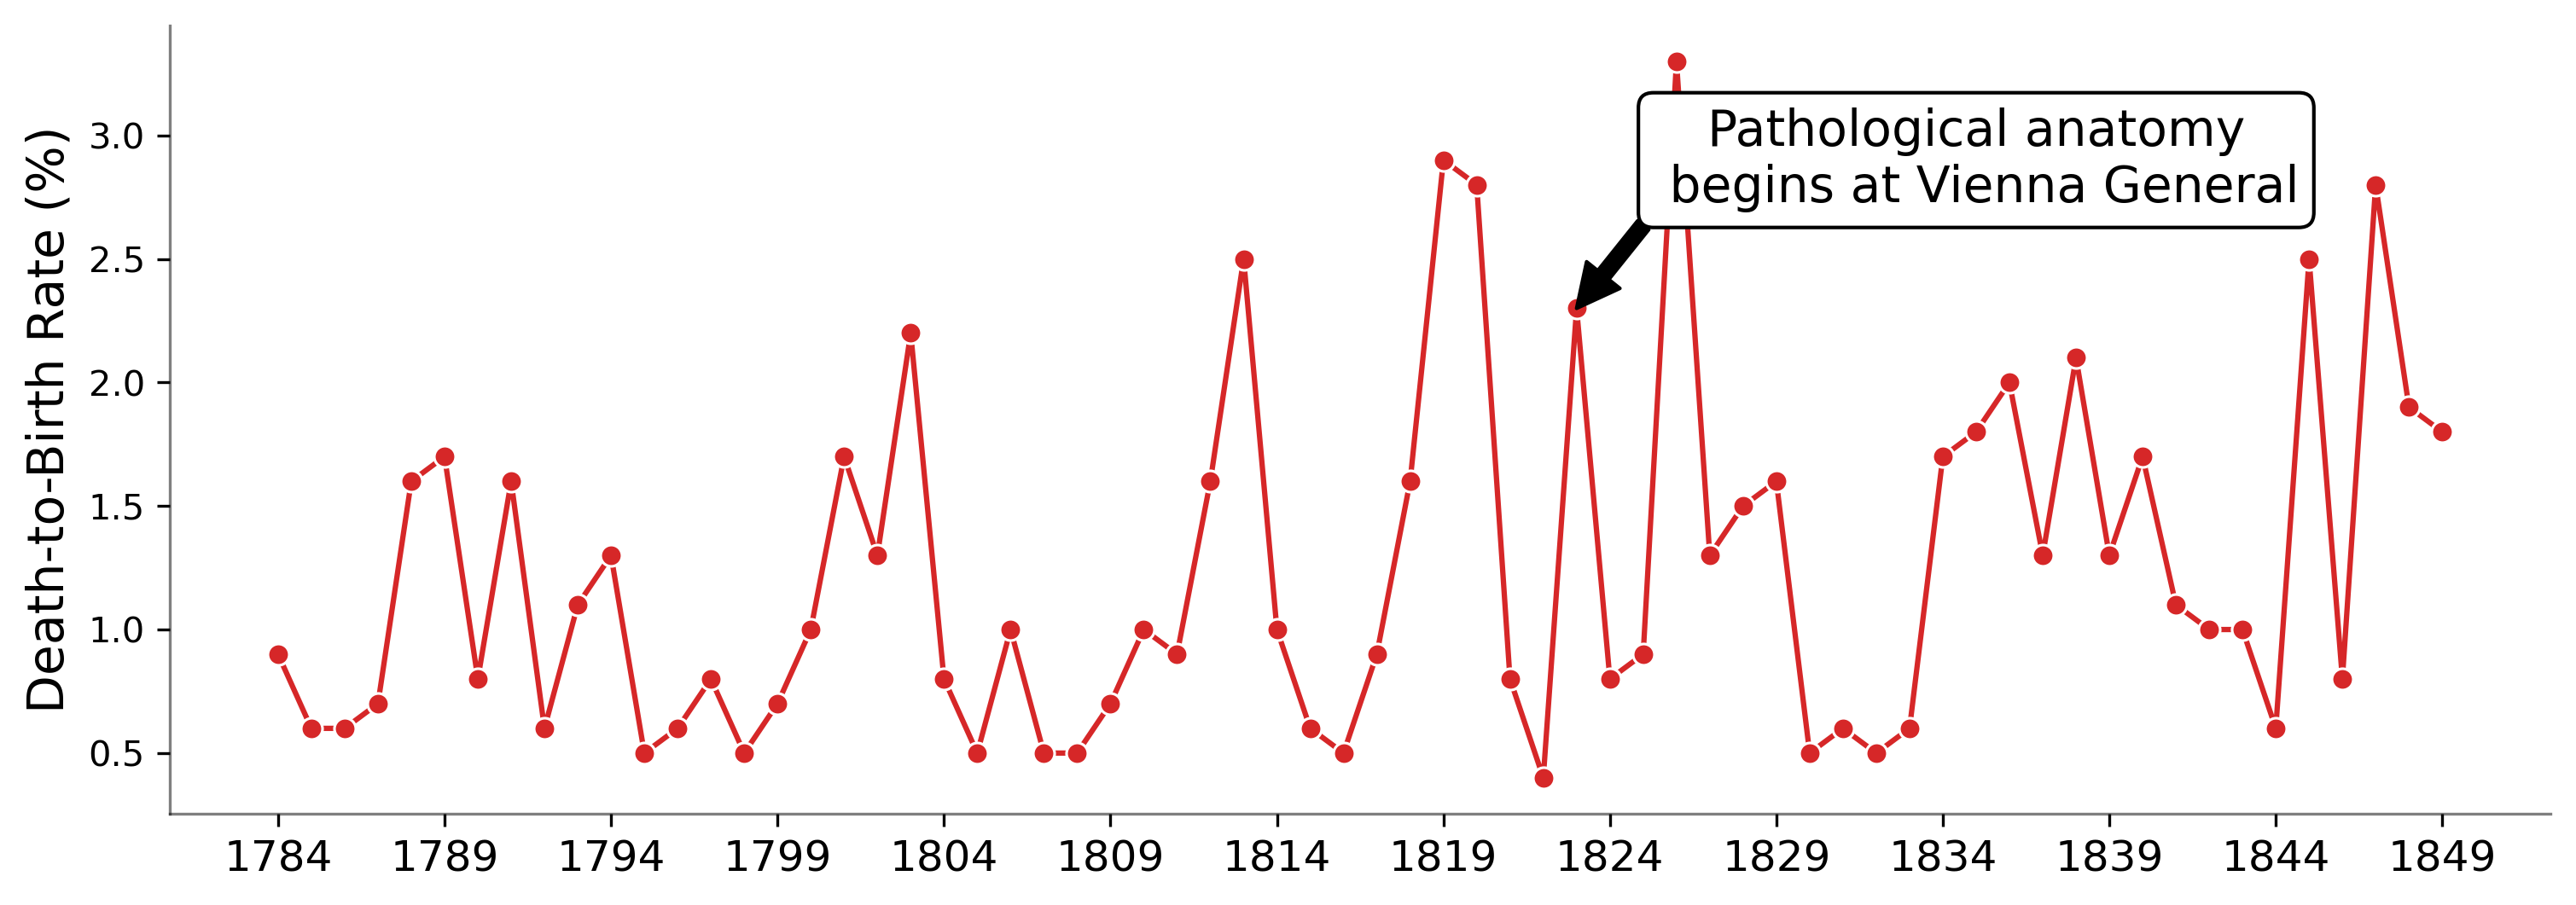

In [25]:
# Time series of Dublin death-to-birth ratios
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in line chart
sns.lineplot(dublin_df, 
             x='Year', 
             y='Rate', 
             marker='o', 
             color='tab:red')

# Annotation for pathological anatomy
ax.annotate("Pathological anatomy\n begins at Vienna General",
           xy=(39,2.3), 
            xytext=(51,2.9),
            ha='center',
            va='center',
            fontsize=14,
           bbox=dict(facecolor='white', edgecolor='black', boxstyle='Round'),
           arrowprops=dict(facecolor='black'),
           )

# Set the x-tick labels with increased intervals
labels = dublin_df['Year']
tick_interval = 5  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center', fontsize=12) 

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
ax.set_ylabel('Death-to-Birth Rate (%)', fontsize=14)
ax.set_xlabel('')

# Add title
# plt.title('Dublin Maternity Hospital Death-to-Birth Rates', fontsize=16)

# Show plot
plt.show()

## Figure 8.6: Death-to-birth rates for Dublin Maternity Hospital and the associated mean

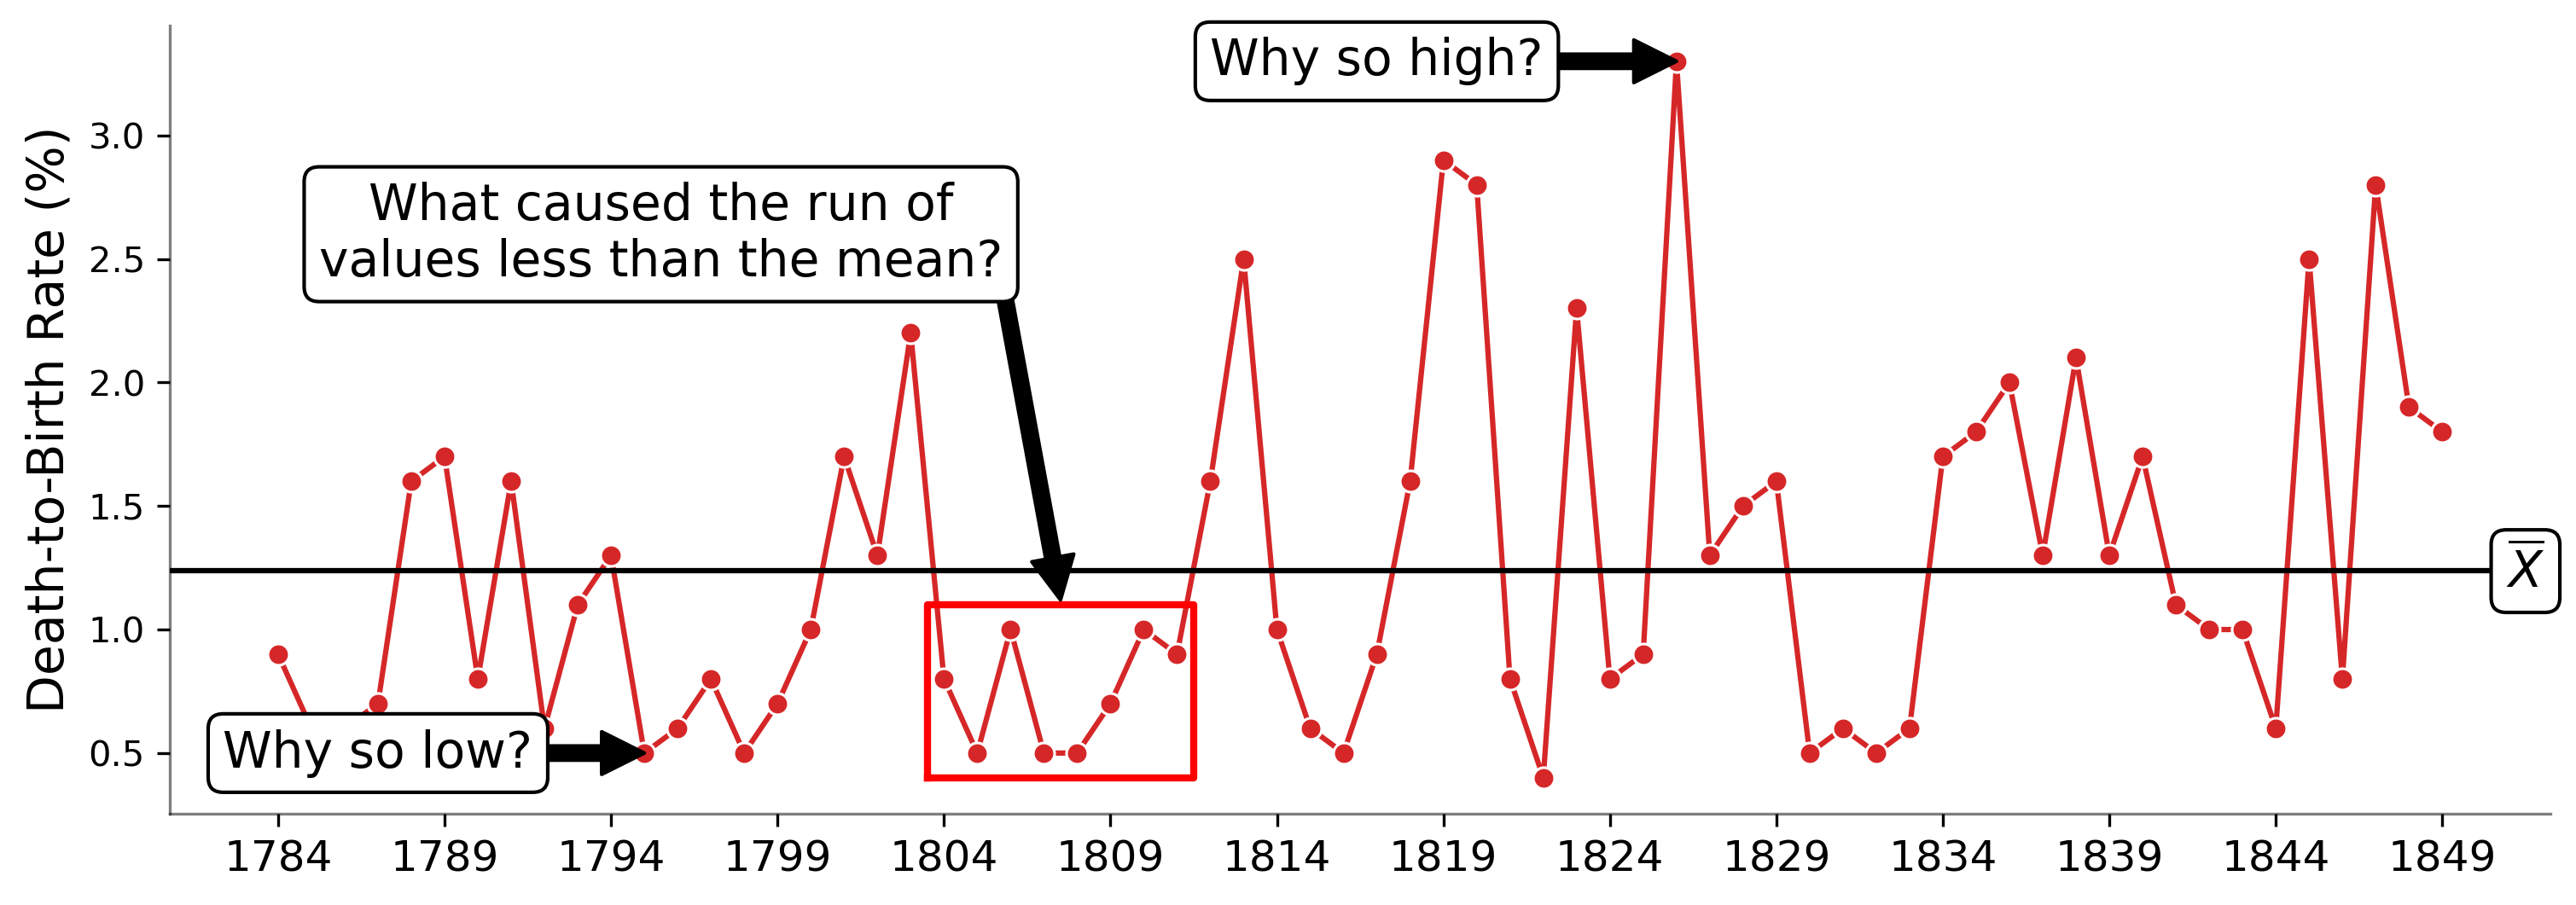

In [27]:
# Indivudal time series
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot the dublin data
sns.lineplot(dublin_df, 
             x='Year', 
             y='Rate', 
             marker='o', 
             color='tab:red')

# Add line a dataset mean
ax.axhline(round(dublin_df['Rate'].mean(),2), ls='-', color='black')

# Set the x-tick labels with increased intervals
labels = dublin_df['Year']
tick_interval = 5  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center', fontsize=12) 

# Add title
# plt.title('Dublin Maternity Hopsital Death-to-Birth Rates', fontsize=16)

# Add box for highlighting range of values satisfying Rule 3
start_index = 19.5
end_index = 27.5  
y_min = 0.4  
y_max = 1.1  

# # Add a border using plt.plot()
ax.plot([start_index, end_index, end_index, start_index, start_index], 
         [y_min, y_min, y_max, y_max, y_min], color='red', linewidth=2)

# Define details for annotations (text, xy-coordinates, xytext-coordinates)
annotations = [
    ('Why so low?', (11,0.5), (3,0.5)),
    ('Why so high?', (42,3.3), (33,3.3)),
    ('What caused the run of\nvalues less than the mean?', (23.5,1.12), (11.5,2.6)
#     ('What happend?', (28,1.6), (19,1.9)
    )
    ]

# Add annotations using a loop
for text, xy, xytext in annotations:
    ax.annotate(text, xy=xy, xytext=xytext,
                ha='center', va='center', fontsize=14,
                bbox=dict(facecolor='white', boxstyle='round'),
                arrowprops=dict(facecolor='black'))

ax.annotate(r"$\overline{X}$",
            xy=(67.5,dublin_df['Rate'].mean()),
            ha='center',
            va='center',
            fontsize=14,
           bbox=dict(facecolor='white', edgecolor='black', boxstyle='Round'),
           )

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
ax.set_ylabel('Death-to-Birth Rate (%)', fontsize=14)
ax.set_xlabel('')

# Show plot
plt.show()

## Figure 8.7: Time series of death-to-birth rates at Dublin Maternity Hospital and the associated line of best fit

In [33]:
# Calculate trendline
x = np.arange(1,67)
y = dublin_df['Rate']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# Extract coefficients
slope = coefficients[0]
intercept = coefficients[1]

# Print the equation of the line
print(f"The equation of the trendline is: y = {slope:.2f}x{intercept:.2f}")

The equation of the trendline is: y = 0.01x0.86


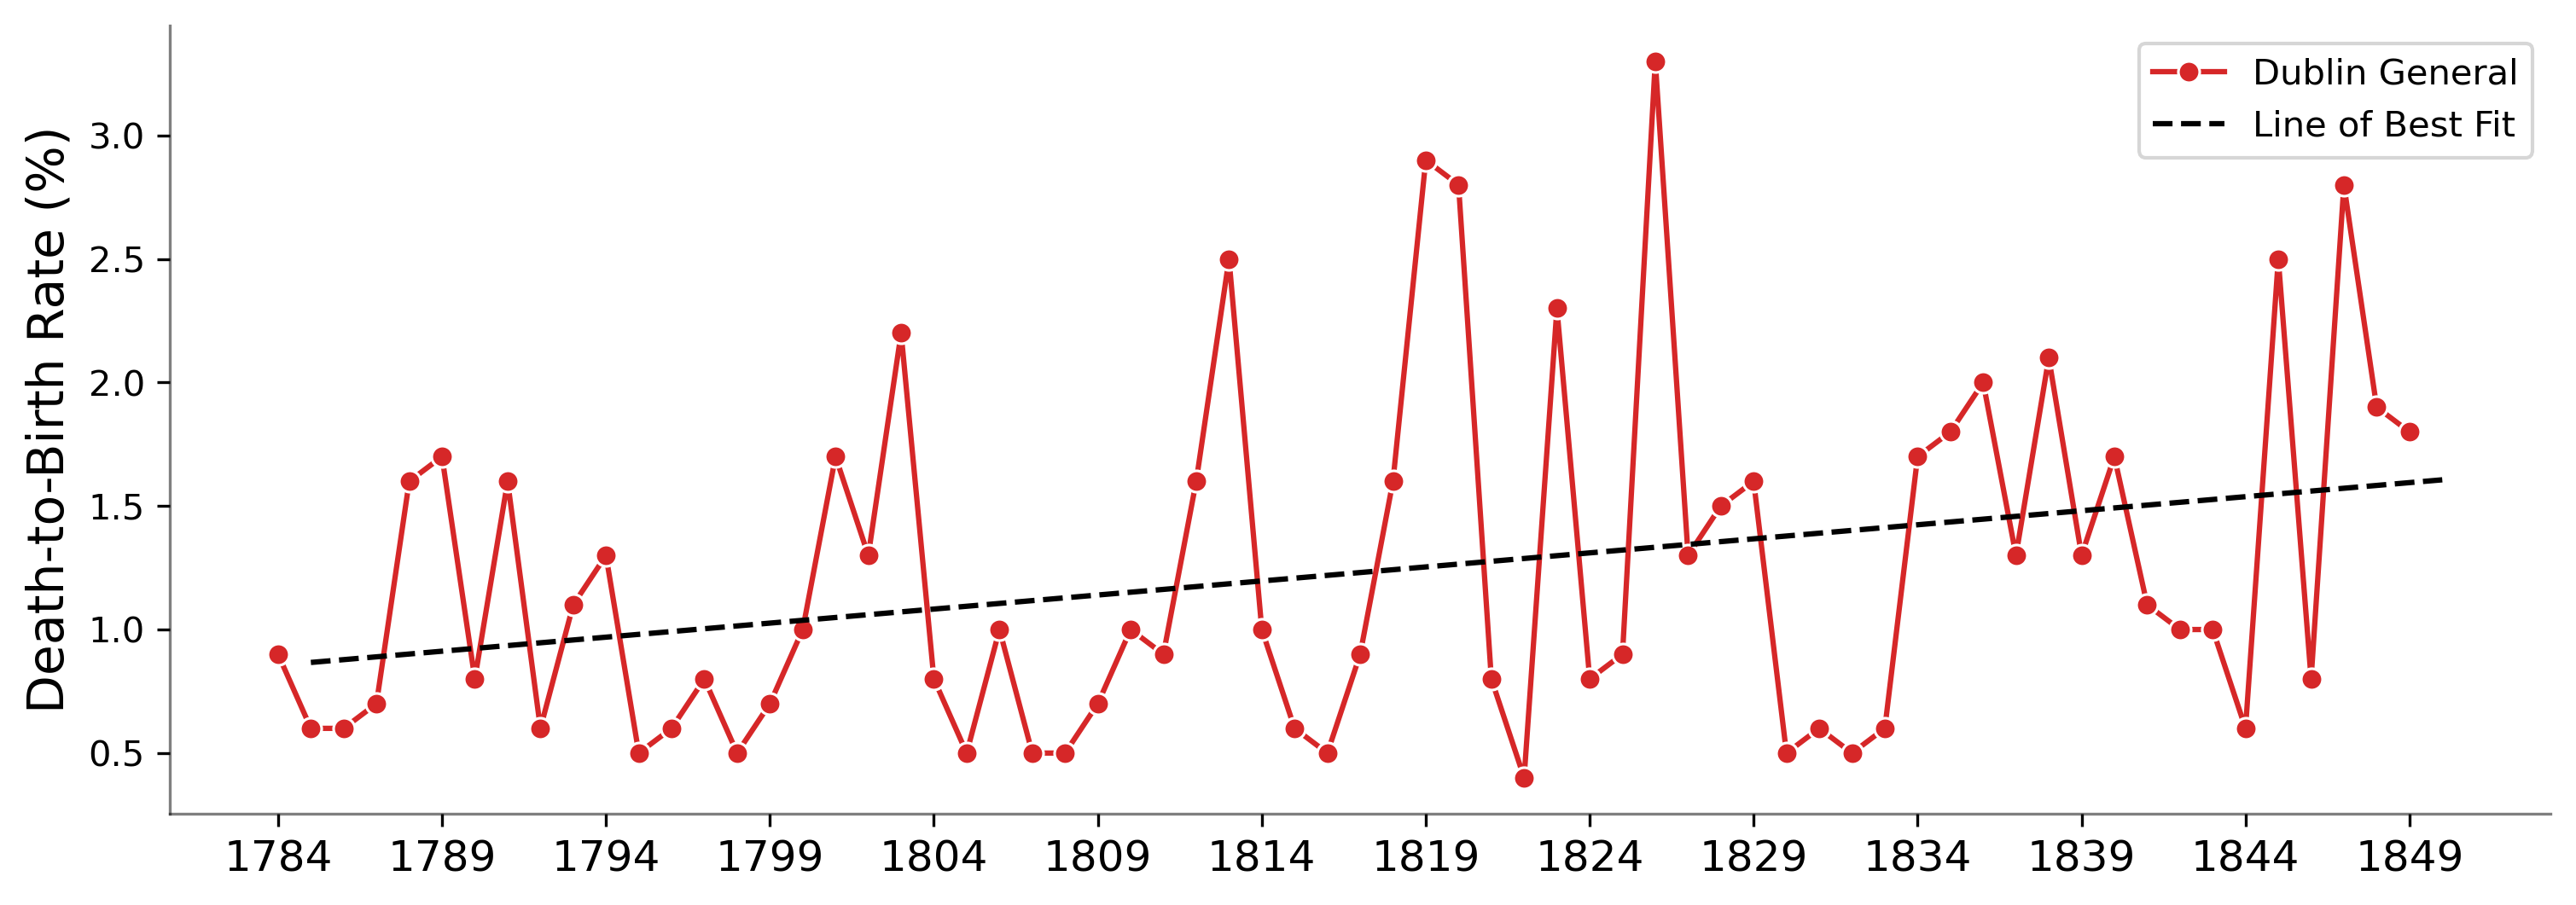

In [34]:
# Plot the data
fig, ax = plt.subplots(figsize=(12,4), dpi=300)
sns.lineplot(data=dublin_df, 
             x='Year', 
             y='Rate', 
             marker='o', 
             color='tab:red', 
             ax=ax, 
             label='Dublin General')

# Plot the trendline
ax.plot(x, trendline, color='black', linestyle='--', label='Line of Best Fit')

# Set the x-tick labels with increased intervals
labels = dublin_df['Year']
tick_interval = 5  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center', fontsize=12) 

# Add title
# plt.title('Dublin Maternity Hospital Death-to-Birth Rates', fontsize=16)

# Show legend
plt.legend()

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
ax.set_ylabel('Death-to-Birth Rate (%)', fontsize=14)
ax.set_xlabel('')

# Show plot
plt.show()